## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import norm

## Loading Transactions Dataset

In [2]:
transaction_df = pd.read_csv('TRANSACTION_TAKEHOME.csv')
transaction_df.shape
transaction_df

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


In [3]:
#Familiarizing with the dataset
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


As we can see from the above display of dataframe, we have whitespace as values (which is actually a null value) for Final Sale Column. This is a data quality issue. Thus, replacing the whitespace with NaN for further data analysis.

In [4]:
#Converting the 'FINAL_SALE' column to numeric, replacing invalid strings with NaN
transaction_df['FINAL_SALE'] = pd.to_numeric(transaction_df['FINAL_SALE'], errors='coerce')
transaction_df['FINAL_SALE']

0          NaN
1         1.49
2          NaN
3         3.49
4          NaN
         ...  
49995     1.18
49996     2.00
49997    20.96
49998     3.00
49999     5.48
Name: FINAL_SALE, Length: 50000, dtype: float64

Understanding the Final Quantity Column

In [5]:
#Displaying all the Sum Counts for each unique Final Quantity value
value_counts = transaction_df['FINAL_QUANTITY'].value_counts()

for value, count in value_counts.items():
    print(f'{value}: {count}')

1.00: 35698
zero: 12500
2.00: 1285
3.00: 184
4.00: 139
6.00: 26
5.00: 22
8.00: 8
12.00: 7
7.00: 7
10.00: 5
1.40: 4
0.23: 4
1.35: 4
1.47: 3
0.86: 3
1.28: 3
9.00: 3
0.46: 3
2.58: 2
2.34: 2
4.55: 2
0.09: 2
1.81: 2
2.75: 2
1.44: 2
2.89: 2
0.65: 2
2.83: 2
2.93: 2
1.88: 2
276.00: 2
1.54: 2
2.39: 2
18.00: 2
1.69: 2
0.53: 2
0.51: 2
2.17: 2
1.24: 2
0.62: 2
16.00: 2
2.60: 2
0.01: 1
0.04: 1
1.99: 1
2.18: 1
3.11: 1
1.89: 1
5.53: 1
1.08: 1
1.37: 1
2.25: 1
0.48: 1
3.02: 1
0.35: 1
0.99: 1
1.80: 1
0.94: 1
2.04: 1
3.69: 1
0.70: 1
2.52: 1
3.24: 1
2.10: 1
2.11: 1
1.07: 1
0.87: 1
3.33: 1
2.54: 1
2.20: 1
1.93: 1
1.34: 1
1.13: 1
2.19: 1
0.83: 1
2.61: 1
0.28: 1
1.50: 1
0.97: 1
0.24: 1
1.18: 1
6.22: 1
1.22: 1
1.23: 1
2.57: 1
2.27: 1


After assessing the unique values in Final Quantity column, We can see that there are some issues like we need to replace Zero as '0'. Also, We have many values as decimal but assuming that the Quantity should be a whole number, we need to check the rows and clean the data according to that.

In [6]:
#Replacing zero with 0 in Final Quantity Column
transaction_df['FINAL_QUANTITY'] = transaction_df['FINAL_QUANTITY'].replace('zero',0)

#Converting the column Final Quantity from object to float datatype
transaction_df['FINAL_QUANTITY'] = pd.to_numeric(transaction_df['FINAL_QUANTITY'])

transaction_df['FINAL_QUANTITY']

0        1.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
49995    2.0
49996    1.0
49997    1.0
49998    1.0
49999    1.0
Name: FINAL_QUANTITY, Length: 50000, dtype: float64

In [7]:
#Identifying the rows with Final Quantity Value as Decimal
decimal_rows = transaction_df[transaction_df['FINAL_QUANTITY'] % 1 != 0]
decimal_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 1372 to 49888
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      110 non-null    object 
 1   PURCHASE_DATE   110 non-null    object 
 2   SCAN_DATE       110 non-null    object 
 3   STORE_NAME      110 non-null    object 
 4   USER_ID         110 non-null    object 
 5   BARCODE         76 non-null     float64
 6   FINAL_QUANTITY  110 non-null    float64
 7   FINAL_SALE      80 non-null     float64
dtypes: float64(3), object(5)
memory usage: 7.7+ KB


We can see that only 110 Rows out of whole dataset has Final Quantity Value as Decimal. We will need to clean this before further data analysis. For that we can replace the values by rounding off to the next whole number. This would be better than removing the rows.

## Checking for Missing Values

In [8]:
#Calculating the percentage of missing values for each column
missing_percentage = (transaction_df.isnull().sum() / len(transaction_df)) * 100
print(missing_percentage.apply(lambda x: f'{x:.2f}%'))

RECEIPT_ID         0.00%
PURCHASE_DATE      0.00%
SCAN_DATE          0.00%
STORE_NAME         0.00%
USER_ID            0.00%
BARCODE           11.52%
FINAL_QUANTITY     0.00%
FINAL_SALE        25.00%
dtype: object


As we can see above, Final sale has 25% Blanks/Null Values. It can be considered as a huge data quality issue as Final Sale is the most important factors in understanding the User spending behavior.

## Checking for Redundant Data

In [9]:
transaction_df.duplicated().sum()

171

We only have 171 duplicated rows in the whole dataset. We can just remove those rows from our dataset before further data analysis.

## Studying the Numerical Columns

In [10]:
transaction_df[['FINAL_SALE','FINAL_QUANTITY']].describe()

,FINAL_SALE,FINAL_QUANTITY
count,37500.000000,50000.000000
mean,4.576384,0.814427
std,6.625663,1.841794
min,0.000000,0.000000
25%,1.790000,0.007500
50%,3.000000,1.000000
75%,5.190000,1.000000
max,462.820000,276.000000


The Max values for both columns deviate a lot from 75%. This indicates the presence of high value outliers. Thus plotting Histogram with Normal Distrubution Curve for both the columns below.

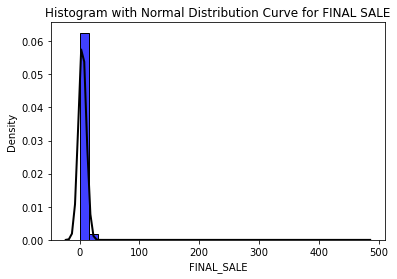

In [11]:
#Plotting the histogram
sns.histplot(transaction_df['FINAL_SALE'], kde=False, stat="density", bins=30, color='blue')

#Plotting the normal distribution curve
mean_sale = transaction_df['FINAL_SALE'].mean()
std_dev_sale = transaction_df['FINAL_SALE'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_sale, std_dev_sale)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram with Normal Distribution Curve for FINAL SALE')
plt.show()

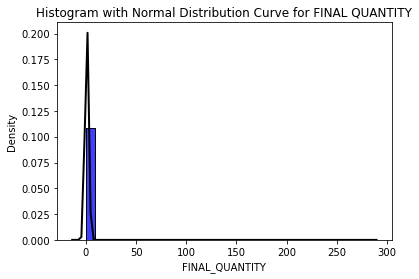

In [12]:
#Plotting the histogram
sns.histplot(transaction_df['FINAL_QUANTITY'], kde=False, stat="density", bins=30, color='blue')

#Plotting the normal distribution curve
mean_quantity = transaction_df['FINAL_QUANTITY'].mean()
std_dev_quantity = transaction_df['FINAL_QUANTITY'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_quantity, std_dev_quantity)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram with Normal Distribution Curve for FINAL QUANTITY')
plt.show()

The distribution of Final Sale and Final Quantity data is right-skewed, it means that the tail on the right-hand side is longer than the left-hand side, indicating the presence of some higher-value outliers.

# Final Thoughts:

The major data quality issues found in this dataset:

1) Assuming the Final Sale column is the Total Spent Amount for that Transaction, 25% of Values are missing for that Column. This can be a major data quality issue as it could result in user not receiving correct amount of reward points (user dissatisfaction) or could segment the user incorretly resulting in failed personalised marketing or misinterpreting the sales volume could affect Fetch's brand partnerships.

Minor Data Quality issues found in this dataset:

1) Small number of Redundant Data (Duplicate Rows), We can remove them to obtain a consistent dataset.

2) Some values in the Final Quantity Column has decimal values. Assuming that the Final Quantity is the no of products bought by User in the receipt scanned for that transaction, it cannot be a decimal number. Instead of removing those rows, we can replace the values by rounding off to the next greatest whole number. Some Values are between 0 and 1 so choosing lower whole number would'nt make sense making the transaction value 0.

3) Small percentage of values are missing in Barcode Colums which will have to be dealt with.

4) Final Sale and Final Quantity data both have high-value outliers. These anomalies may indicate data entry errors or unusual transactions, which can misinform business decisions, such as revenue forecasts


## Additional data analysis for insights

In [13]:
#Loading Dataset
products_df = pd.read_csv('PRODUCTS_TAKEHOME.csv')

In [14]:
#Loading Dataset
user_df = pd.read_csv('USER_TAKEHOME.csv')

By analysis of User dataset, we know that Females are feth's major user base. Thus, identifying the products that Female demographics are most insterested in can help Fetch increase their revenue by trageted marketing and promotional offers in collaboration with the brands carrying those products.

In [15]:
#Filter for female users
female_users = user_df[user_df['GENDER'] == 'female']

#Merging user and transaction dataframes
female_transactions = pd.merge(female_users, transaction_df, left_on='ID', right_on='USER_ID')

#Merging the result with the product dataframe
female_transactions_with_product = pd.merge(female_transactions, products_df, on='BARCODE')

#Group by CATEGORY_1 to finding the top 5 general categories
top_categories = (female_transactions_with_product.groupby('CATEGORY_1').size().nlargest(5).reset_index(name='Total Purchases'))

#For each top category, finding the top 5 subcategories (CATEGORY_2)
top_subcategories = (female_transactions_with_product[female_transactions_with_product['CATEGORY_1'].isin(top_categories['CATEGORY_1'])]
                     .groupby(['CATEGORY_1', 'CATEGORY_2'])
                     .size()
                     .groupby(level=0, group_keys=False)
                     .nlargest(5)
                     .reset_index(name='Subcategory Purchases'))

# Displaying the result
print("Top 5 Categories and their respective top Subcategories bought by Females:")
for category in top_categories['CATEGORY_1']:
    print(f"\nCategory: {category}")
    subcategories = top_subcategories[top_subcategories['CATEGORY_1'] == category]
    for index, row in subcategories.iterrows():
        print(f"   - Subcategory: {row['CATEGORY_2']} | Purchases: {row['Subcategory Purchases']}")

Top 5 Categories and their respective top Subcategories bought by Females:

Category: Health & Wellness
   - Subcategory: Skin Care | Purchases: 8824
   - Subcategory: Medicines & Treatments | Purchases: 8452
   - Subcategory: Bath & Body | Purchases: 7444
   - Subcategory: Hair Care | Purchases: 6890
   - Subcategory: Hair Removal | Purchases: 2464

Category: Snacks
   - Subcategory: Candy | Purchases: 5854
   - Subcategory: Snack Bars | Purchases: 3414
   - Subcategory: Chips | Purchases: 3090
   - Subcategory: Crackers | Purchases: 2560
   - Subcategory: Dips & Salsa | Purchases: 2144

Category: Restaurant
   - Subcategory: Beverages | Purchases: 726
   - Subcategory: À La Carte Item | Purchases: 22

Category: Alcohol
   - Subcategory: Wine | Purchases: 484
   - Subcategory: Beer | Purchases: 90

Category: Beverages
   - Subcategory: Carbonated Soft Drinks | Purchases: 138
   - Subcategory: Water | Purchases: 88


This output can help understand the categories that resonates most with Females.